# Initialization

In [1]:
# load curvatures
import numpy as np
import cPickle as pickle
from os.path import join

with open("../dataset_loc", 'r') as f:
    dataset_loc = f.read().rstrip()

with open(join(dataset_loc, "Flukes/zooniverse_curvatures_winteg.pkl"), 'r') as f:
    curvatures = pickle.load(f)

In [23]:
# Autogenerated on 15:23:05 2015/12/16
# Regen Command:
#    /home/zach/envs/thesis/ibeis/ibeis/__main__.py --tf generate_notebook_report --db flukes --ipynb
#
# Matplotlib stuff
import matplotlib as mpl
%matplotlib inline
%load_ext autoreload
%autoreload

# Set global utool flags
import utool as ut
ut.util_io.__PRINT_WRITES__ = False
ut.util_io.__PRINT_READS__ = False
ut.util_parallel.__FORCE_SERIAL__ = True
ut.util_cache.VERBOSE_CACHE = False
ut.NOT_QUIET = False

draw_case_kw = dict(show_in_notebook=True, annot_modes=[0, 1])

# Setup database specific parameter configurations
db = 'humpbacks'

# Pick one of the following annotation configurations
# to choose the query and database annotations
a = [
    'default',
    #'default:min_timedelta=3600,require_timestamp=True',
#'default:qsame_encounter=True,been_adjusted=True,excluderef=True'
#'default:qsame_encounter=True,been_adjusted=True,excluderef=True,qsize=10,dsize=20',
#'timectrl:',
#'timectrl:qsize=10,dsize=20',
#'timectrl:been_adjusted=True,dpername=3',
#'unctrl:been_adjusted=True',
    #'default:is_known=True',
    #'default:qsame_encounter=True,been_adjusted=True,excluderef=True'
    #'default:qsame_encounter=True,been_adjusted=True,excluderef=True,qsize=10,dsize=20',
    #'timectrl:',
    #'timectrl:qsize=10,dsize=20',
    #'timectrl:been_adjusted=True,dpername=3',
    #'unctrl:been_adjusted=True',
]

# Uncomment one or more of the following pipeline configurations to choose
# how the algorithm will run.  If multiple configurations are chosen, they
# will be compared in the histograms, but only the first configuration will
# be used for inspecting results.
t = [
    'invarbest:fg_on=[True,False]',
#'default:K=1',
#'default:K=1,adapteq=True',
#'default:K=1,AI=False',
#'default:K=1,AI=False,QRH=True',
#'default:K=1,RI=True,AI=False',
    #'default',
    #'default:K=1',
    #'default:K=1,adapteq=True',
    #'default:K=1,AI=False',
    #'default:K=1,AI=False,QRH=True',
    #'default:K=1,RI=True,AI=False',
]

# Load database for this test run
import ibeis
ibs = ibeis.opendb(db=db)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
valid_aids = ibs.get_valid_aids()
valid_imgnames = ibs.get_annot_image_names(valid_aids)
imgname_aid_dict = {imgname:aid for imgname, aid in zip(valid_imgnames, valid_aids)}
curvature_aids = [imgname_aid_dict[c['fn']] for c in curvatures] 

In [26]:
#ibs._overwrite_all_annot_species_to(ibeis.const.Species.WHALE_FLUKES)
#ibs.get_annot_species(curvature_aids)

# Annotation Config Info

In [28]:
acfg_list, expanded_aids_list = ibeis.expt.experiment_helpers.get_annotcfg_list(
    ibs, acfg_name_list=a, initial_aids=curvature_aids)
ibeis.expt.annotation_configs.print_acfg_list(acfg_list, expanded_aids_list, ibs)

+=== <Info acfg_list> ===
non-varied aidcfg = {
    'common': {
        '_cfgindex': 0,
        '_cfgname': 'default',
        '_cfgstr': 'default',
        'sample_rule': 'random',
        'sample_rule_ref': 'random',
        'sample_size': 816,
        'shuffle': False,
        'view_ext': 0,
    },
    'dcfg': {
        '_cfgtype': 'dcfg',
    },
    'qcfg': {
        '_cfgtype': 'qcfg',
    },
}
+--- acfg 1 / 1 -- q_cfgname=default d_cfgname=default ---- 
acfg = {}
annot_config_stats = {
    'dbname': humpbacks,
    'num_qaids': 816,
    'num_daids': 816,
    'num_annot_intersect': 816,
    'qaid_stats': {
        'num_qaids': 816,
        'qhashid': _QSUUIDS((816)2zhxcy2pl@j!h%+j),
        'qper_name': {max: 11, min: 1, mean: 2.75, std: 1.39, nMin: 4, nMax: 1, shape: (297,), med: 2},
        'qper_vp': {None: 816},
    },
    'daid_stats': {
        'num_daids': 816,
        'dhashid': _DSUUIDS((816)2zhxcy2pl@j!h%+j),
        'dper_name': {max: 11, min: 1, mean: 2.75, std: 1.39, n

# Pipeline Config Info

In [29]:
cfgdict_list, pipecfg_list = ibeis.expt.experiment_helpers.get_pipecfg_list(
    test_cfg_name_list=t, ibs=ibs)
ibeis.expt.experiment_helpers.print_pipe_configs(cfgdict_list, pipecfg_list)

+--- 0 / 2 ===
invarbest:affine_invariance=False,augment_queryside_hack=True,fg_on=True
_vsmany_NN(single,K=4,Kn=1,padk=False,cks800)_NNWeight(lnbnn,fg,last)_SV(0.01;2.0;1.57minIn=4,nNRR=50,nARR=6,nsum,cdl,+wi,+fc,)_AGG(nsum)_FLANN(8_kdtrees)_RRVsOne(False)_FEATWEIGHT(ON,uselabel,cnn)_FEAT(hesaff+sift_affine_invariance=False)_CHIP(sz450)_HACK(augment_queryside)
L___
+--- 1 / 2 ===
invarbest:affine_invariance=False,augment_queryside_hack=True,fg_on=False
_vsmany_NN(single,K=4,Kn=1,padk=False,cks800)_NNWeight(lnbnn,last)_SV(0.01;2.0;1.57minIn=4,nNRR=50,nARR=6,nsum,cdl,+wi,+fc,)_AGG(nsum)_FLANN(8_kdtrees)_RRVsOne(False)_FEATWEIGHT(OFF)_FEAT(hesaff+sift_affine_invariance=False)_CHIP(sz450)_HACK(augment_queryside)
L___


# Query Accuracy (% correct annotations)

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks -a default -t invarbest:fg_on=[True,False] --show


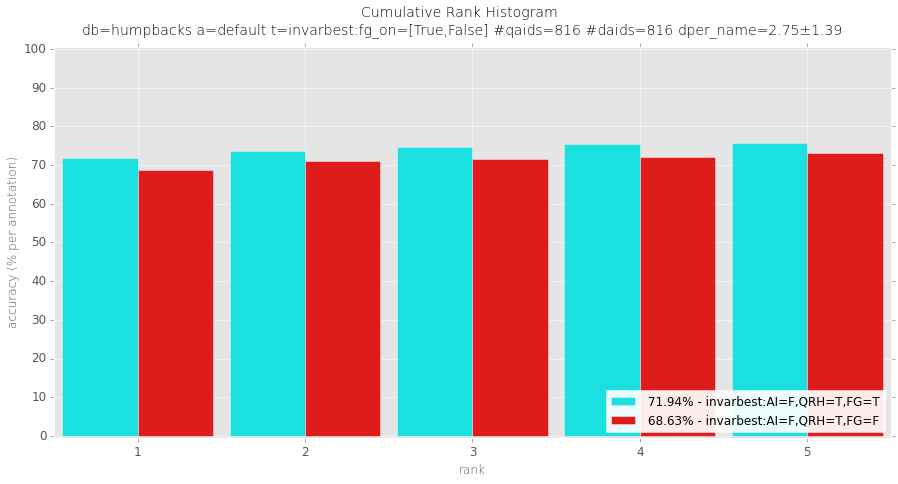

In [30]:
testres = ibeis.run_experiment(
    initial_aids=curvature_aids,
    e='rank_cdf',
    db=db, a=a, t=t)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func()

# Query Accuracy (% correct names)

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks -a default -t invarbest:fg_on=[True,False] --show


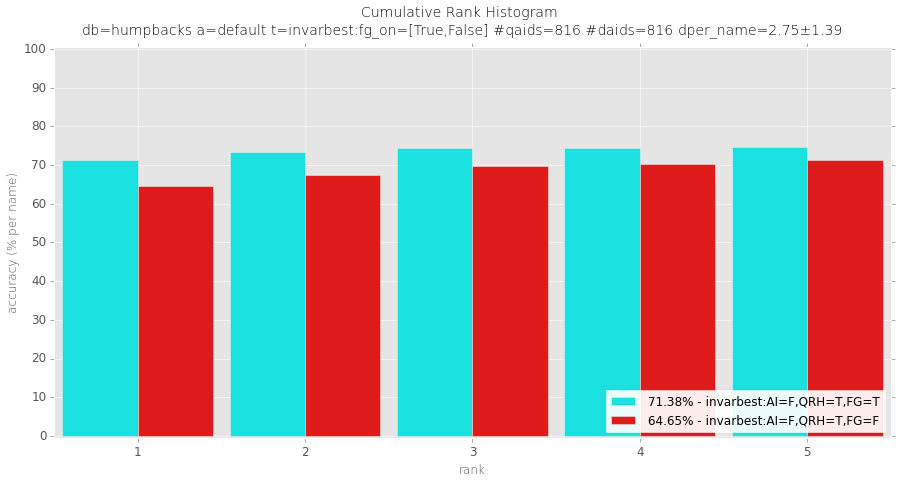

In [31]:
testres = ibeis.run_experiment(
    initial_aids=curvature_aids,
    e='rank_cdf',
    db=db, a=a, t=t, do_per_annot=False)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func()

In [32]:
print(testres.get_truth2_prop()[1]['is_success'].shape)
testres.print_config_overlap()
#ibs.get_annot_image_names(testres.get_common_qaids())

(816, 2)
Config Overlap
cfgx1 and cfgx2 have <x> not in common
disjoint_mat =
[[ 0 39]
 [39  0]]
cfgx1 helps cfgx2 by <x>
disjoint_mat2 =
[[ 0 33]
 [ 6  0]]
best_cfgx = 0
cfgx 1) has 6 success cases that that the best config does not have -- invarbest:affine_invariance=False,augment_queryside_hack=True,fg_on=False+default:


In [33]:

with open('./blockcurv_noalign_minchoice_rank.pkl', 'r') as f:
    blockcurv_noalign_minchoice_rank = pickle.load(f)

with open('./blockcurv_noalign_avgchoice_rank.pkl', 'r') as f:
    blockcurv_noalign_avgchoice_rank = pickle.load(f)

In [34]:
hotspotter_rank = {fn:succ[0] for fn, succ in zip(ibs.get_annot_image_names(testres.get_common_qaids()),
                                               testres.get_truth2_prop()[1]['is_success'])}

In [35]:
def dict_intersect(d1, d2):
    d1_only = []
    d2_only = []
    both = []
    neither = []
    for key1 in d1:
        if key1 not in d2:
            print("%s not in d2"  % key1)
            continue
        if d1[key1] and not d2[key1]:
            d1_only.append(key1)
        elif d2[key1] and not d1[key1]:
            d2_only.append(key1)
        elif d2[key1] and d1[key1]:
            both.append(key1)
        else:
            neither.append(key1)

    return d1_only, d2_only, both, neither
hotspotter_only, bc_only, both, neither = dict_intersect(hotspotter_rank, blockcurv_noalign_minchoice_rank)

20110615-DominicLaniewicz-HBack3.jpg not in d2
20130811-DB-LA3A8109.jpg not in d2
CINMS_20100328_A1172.jpg not in d2
20120506-DB-5119.jpg not in d2


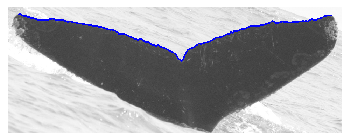

In [36]:
# show random image from list
import random
import cv2
from os.path import join
img_info_map = {i['fn']:{'path':i['path']} for i in curvatures}
def overlay_path(img, path):
    img_copy = img[:]
    # assume path is x, y
    for j, i in path:
        if (j >= img_copy.shape[1] or j < 0) or (i >= img_copy.shape[0] or i < 0):
                continue
        cv2.circle(img_copy, (j, i), 2, (255,0,0), thickness=-1)
        #img_copy[i,j] = [255,0,0]
    return img_copy
imgs_dir = join(dataset_loc, "Flukes/CRC_combined constrained")
import plottool as pt
def show_img(img_list):
    rand_img = random.choice(img_list)
    pt.imshow(overlay_path(cv2.imread(join(imgs_dir,rand_img)),img_info_map[rand_img]['path']))
show_img(bc_only)

In [37]:
print("Hotspotter only: %0.2f" % (len(hotspotter_only) / float(len(hotspotter_rank))))
print("Block Curve DTW only: %0.2f" % (len(bc_only) / float(len(hotspotter_rank))))
print("Both: %0.2f" % (len(both) / float(len(hotspotter_rank))))
print("Neither: %0.2f" % (len(neither) / float(len(hotspotter_rank))))

Hotspotter only: 0.29
Block Curve DTW only: 0.10
Both: 0.43
Neither: 0.18


In [55]:
# IBEIS reported that there's a bunch of images w/0 datetime between them, I wonder what these are
from itertools import combinations
date_aid_pairs = zip(curvature_aids, ibs.get_image_datetime(curvature_aids), ibs.get_annot_nids(curvature_aids))
sametime_pairs = []
from datetime import datetime
from datetime import timedelta
bad_aids = set()
for (aid1, date1, id1), (aid2, date2, id2) in combinations(date_aid_pairs, 2):
    if date1 == 'NA':
        bad_aids.add(aid1)
    if date2 == 'NA':
        bad_aids.add(aid2)
    if date1 == 'NA' or date2 == 'NA':
        continue
    datetime1 = datetime.strptime(date1, "%Y/%m/%d %H:%M:%S")
    datetime2 = datetime.strptime(date2, "%Y/%m/%d %H:%M:%S")
    if (id1 == id2) and (abs(datetime1 - datetime2) < timedelta(hours=1)):
        #print(abs(datetime1 - datetime2))
        sametime_pairs.append((aid1, aid2))

def show_imgpair(imgpair):
    imgname1, imgname2 = ibs.get_image_gnames(imgpair)
    fig = pt.gcf()
    fig.set_size_inches(20,20)
    pnum_ = pt.make_pnum_nextgen(1,2)
    pt.imshow(cv2.imread(join(imgs_dir, imgname1)), pnum=pnum_())
    pt.imshow(cv2.imread(join(imgs_dir, imgname2)), pnum=pnum_())
    

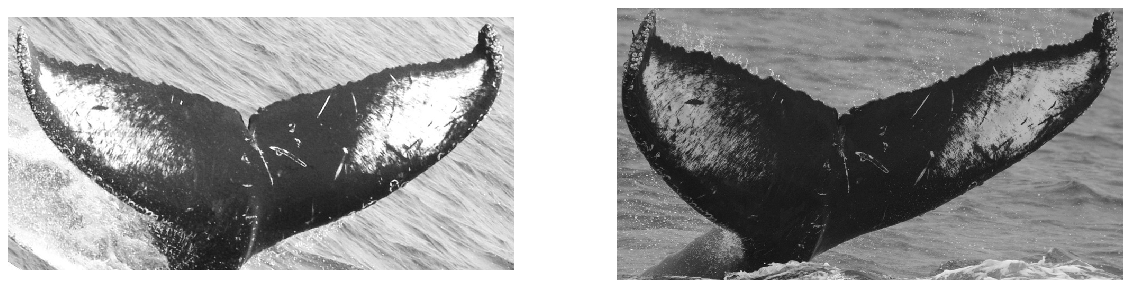

In [68]:
show_imgpair(random.choice(sametime_pairs))

In [56]:
print(len(sametime_pairs))
aids_wclose_samename = set()
for aid1, aid2 in sametime_pairs:
    aids_wclose_samename.add(ibs.get_annot_image_names(aid1))
    aids_wclose_samename.add(ibs.get_annot_image_names(aid2))
print(len(aids_wclose_samename))
print(len(bad_aids))
#aids_wclose_samename.update(bad_aids)

29
55
66


In [48]:
# how do these breakdown into the hotspotter versus bc-dtw results
print(len(filter(lambda x: x in aids_wclose_samename, hotspotter_only)) / float(len(hotspotter_only)))
print(len(filter(lambda x: x in aids_wclose_samename, bc_only)) / float(len(bc_only)))
def dict_filter(func, dict_):
    # func operates on a tuple of key,value
    return {key:value for key, value in dict_.items() if func(key, value)}

hotspotter_rank_timefilter = dict_filter(lambda k, v: k not in aids_wclose_samename, hotspotter_rank)
bc_noalign_minc_rank_timefilter = dict_filter(lambda k, v: k not in aids_wclose_samename, 
                                              blockcurv_noalign_minchoice_rank)

hotspotter_only_tf, bc_only_tf, both_tf, neither_tf = dict_intersect(hotspotter_rank_timefilter, 
                                                                     bc_noalign_minc_rank_timefilter)
print("Hotspotter only: %0.2f" % (len(hotspotter_only_tf) / float(len(hotspotter_rank_timefilter))))
print("Block Curve DTW only: %0.2f" % (len(bc_only_tf) / float(len(hotspotter_rank_timefilter))))
print("Both: %0.2f" % (len(both_tf) / float(len(hotspotter_rank_timefilter))))
print("Neither: %0.2f" % (len(neither_tf) / float(len(hotspotter_rank_timefilter))))

0.161016949153
0.0493827160494
20110615-DominicLaniewicz-HBack3.jpg not in d2
20130811-DB-LA3A8109.jpg not in d2
CINMS_20100328_A1172.jpg not in d2
20120506-DB-5119.jpg not in d2
Hotspotter only: 0.29
Block Curve DTW only: 0.11
Both: 0.41
Neither: 0.19


# Result Timedelta Distribution

Equivalent Command Line:
ibeis -e timedelta_hist --db humpbacks -a default -t invarbest --show


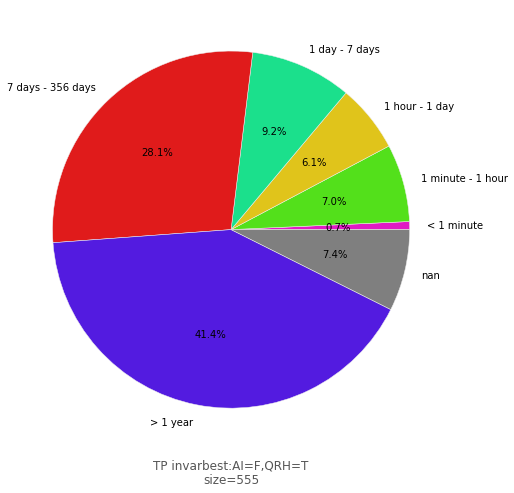

In [278]:
test_result = ibeis.run_experiment(
    initial_aids=curvature_aids,
    e='timedelta_hist',
    db=db,
    a=a[0:1],
    t=t[0:1],
    truepos=True)
test_result.draw_func()

# Result Timestamp Distribution

/home/zach/envs/thesis/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


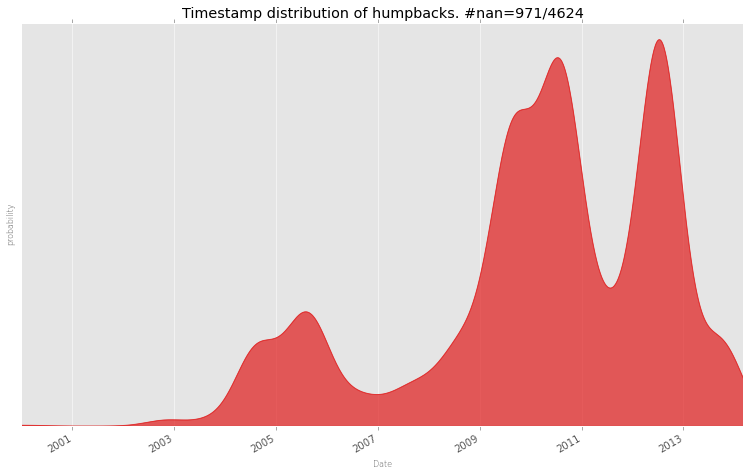

In [38]:
# STARTBLOCK
#latex_stats = ibeis.other.dbinfo.latex_dbstats([ibs], table_position='[h]') + '\n%--'
##print(latex_stats)}
#pdf_fpath = ut.compile_latex_text(latex_stats, dpath=None, verbose=False, quiet=True, pad_stdout=False)
#pdf_fpath = ut.tail(pdf_fpath, n=2)
#print(pdf_fpath)
#from IPython.display import HTML
#HTML('<iframe src="%s" width=700 height=350></iframe>' % pdf_fpath)

#_ = ibeis.other.dbinfo.get_dbinfo(ibs)
ibeis.other.dbinfo.show_image_time_distributions(ibs, ibs.get_valid_gids())
# ENDBLOCK


# Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=False,index=0:3,sortdsc=gtscore,max_pername=1'],
    figsize=(15, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Failure Cases Cases (false pos)

In [ ]:
testres = ibeis.run_experiment(
e='draw_cases',
db=db, a=a[0:1], t=t[0:1],
f=[':fail=True,index=0:3,sortdsc=gfscore,max_pername=1'],
**draw_case_kw)
_ = testres.draw_func()

# Failure Cases Cases (false neg)

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=True,index=0:3,sortdsc=gtscore,max_pername=1'],
    **draw_case_kw)
_ = testres.draw_func()